<a href="https://colab.research.google.com/github/Devesh946/AI_df20555/blob/main/Lab5/bandits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define our actions

def action_0():
    return np.random.choice([1, 0], p=[0.5, 0.5])

def action_1():
    return np.random.choice([1, 0], p=[0.6, 0.4])

def action_2():
    return np.random.choice([1, 0], p=[0.2, 0.8])

rewards = [action_0, action_1, action_2]

In [3]:
for i in range(10):
    print('Pull %d (action_0): reward=%d' % (i, rewards[0]()))

Pull 0 (action_0): reward=0
Pull 1 (action_0): reward=0
Pull 2 (action_0): reward=0
Pull 3 (action_0): reward=0
Pull 4 (action_0): reward=1
Pull 5 (action_0): reward=0
Pull 6 (action_0): reward=1
Pull 7 (action_0): reward=1
Pull 8 (action_0): reward=0
Pull 9 (action_0): reward=1


In [4]:
# Simulate action values (Q): expected reward for each action
pulls = 100000

action_values = []
for reward in rewards:
    value = [reward() for _ in range(pulls)]  # execute each of the actions 'pulls' times
    action_values.append(value)

for action, value in enumerate(action_values):
    print("Action %d: Q(a_%d)=%.2f" % (action, action, np.mean(value)))

Action 0: Q(a_0)=0.50
Action 1: Q(a_1)=0.60
Action 2: Q(a_2)=0.20


In [5]:
# To simulate the values (V), we need to define a policy
# (Value is the expected reward given the policy I'm following)

# Define a policy:
def policy_random():
    '''Returns which action to perform using equal probabilities for each action'''
    return np.random.choice([0, 1, 2], p=[1/3, 1/3, 1/3])


def policy_better():
    ''' A better policy than random: we choose actions 0 and 1 more often than action 2'''
    return np.random.choice([0, 1, 2], p=[0.4, 0.5, 0.1])


In [6]:
# Simulate Values using the random policy
total_reward = 0
for pull in range(pulls):
    action = policy_random()
    total_reward += rewards[action]()
print("Total reward =", total_reward)
print("Average reward: V =", total_reward/pulls)

Total reward = 43508
Average reward: V = 0.43508


In [7]:
# Simulate Values using the better policy
total_reward = 0
for pull in range(pulls):
    action = policy_better()
    total_reward += rewards[action]()
print("Total reward =", total_reward)
print("Average reward: V =", total_reward/pulls)

Total reward = 52394
Average reward: V = 0.52394


In [8]:
# Regret of the better policy
V_star = max([np.mean(value) for value in action_values])
print("V* =", V_star)

total_regret = 0
for pull in range(pulls):
    total_regret += (V_star - rewards[policy_better()]())
print('Regret: I_t = %.2f' % (total_regret/pulls))

V* = 0.59938
Regret: I_t = 0.08


In [9]:
# Some bandit policies to explore:

def policy_greedy(action_values):
    '''Always returns the action for which the payoff is highest'''
    best_action = np.argmax([np.mean(value) for value in action_values])
    return best_action


def policy_e_greedy(action_values, epsilon=0.05):
    '''We explore with epsilon probability, and choose the best action the rest of the time'''
    explore = np.random.choice([1, 0], p=[epsilon, 1-epsilon])
    if explore:
        # Random action
        return policy_random()
    else:
        # Choose best action
        return policy_greedy(action_values)



In [10]:
# Implementing the decaying epsilon-greedy properly requires a class definition so we can store the epsilon values
class DecayingEGreedy:
    
    def __init__(self, epsilon, decay=0.99, lower_bound=0):
        self.epsilon = epsilon
        self.decay = decay
        self.lower_bound = lower_bound
        
    def policy(self, action_values):
        if self.lower_bound > 0 and self.epsilon > self.lower_bound:
            self.epsilon *= self.decay  # update epsilon
        explore = np.random.choice([1, 0], p=[self.epsilon, 1-self.epsilon])  # explore vs exploit decision
        if explore:
            # Random action
            return policy_random()
        else:
            # Choose best action
            return policy_greedy(action_values)


In [11]:
# Let's test the decaying epsilon-greedy approach
agent = DecayingEGreedy(epsilon=0.1, decay=0.99, lower_bound=0.03)

# Full problem:
action_values = [[], [], []] # initialise values
rewards_decaying_e_greedy = []
total_reward = 0
print('Number of pulls\t\tTotal reward\t\tV')
for pull in range(pulls):
    action = agent.policy(action_values)  # choose action according to policy
    reward = rewards[action]()  # get reward
    action_values[action].append(reward)  # update action_values so we make better decisions down the line
    total_reward += reward
    if (pull+1) % 1000 == 0:
        print('%d\t\t\t%d\t\t\t%.3f' % (pull+1, total_reward, total_reward/pull))
        rewards_decaying_e_greedy.append(total_reward/pull)



Number of pulls		Total reward		V
1000			559			0.560


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


2000			1176			0.588
3000			1767			0.589
4000			2347			0.587
5000			2947			0.590
6000			3564			0.594
7000			4179			0.597
8000			4761			0.595
9000			5348			0.594
10000			5932			0.593
11000			6521			0.593
12000			7093			0.591
13000			7693			0.592
14000			8296			0.593
15000			8923			0.595
16000			9502			0.594
17000			10101			0.594
18000			10696			0.594
19000			11296			0.595
20000			11884			0.594
21000			12462			0.593
22000			13057			0.594
23000			13666			0.594
24000			14255			0.594
25000			14828			0.593
26000			15423			0.593
27000			16015			0.593
28000			16603			0.593
29000			17172			0.592
30000			17758			0.592
31000			18364			0.592
32000			18963			0.593
33000			19535			0.592
34000			20116			0.592
35000			20737			0.593
36000			21314			0.592
37000			21934			0.593
38000			22521			0.593
39000			23117			0.593
40000			23682			0.592
41000			24263			0.592
42000			24892			0.593
43000			25504			0.593
44000			26102			0.593
45000			26711			0.594
46000			27284			0.593
47000			27873			0.593
48000			284

Text(0, 0.5, 'Average reward (V)')

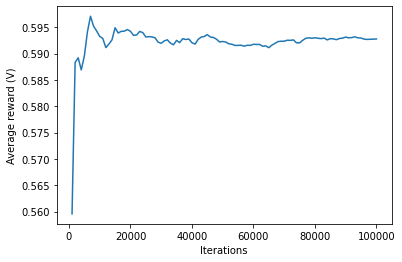

In [12]:
plt.plot(np.arange(1000, pulls+1, step=1000), rewards_decaying_e_greedy)
plt.xlabel("Iterations")
plt.ylabel("Average reward (V)")
# The average reward is 0.594, which is very close to V* (0.6)!

In [13]:
# Implementing the decaying epsilon-greedy properly requires a class definition so we can store the epsilon values
class UCB:
    
    def __init__(self, C=0.5, n_arms=3):
        self.C = C
        self.pulls = 0
        self.counts = np.asarray([0] * n_arms)
        
    def update_counts(self, arm):
        self.pulls += 1
        self.counts[arm] += 1
        
    def policy(self, action_values):
        action_values = np.asarray([np.mean(value) for value in action_values])
        uncertainty = np.sqrt(np.log(self.pulls) / self.counts)
        ucb = action_values + self.C * uncertainty
        action = np.argmax(ucb)
        self.update_counts(action)
        return action


In [14]:
# Let's test the decaying epsilon-greedy approach
agent = UCB(C=0.5)

# Full problem:
action_values = [[], [], []] # initialise values
total_reward = 0 # reset reward
rewards_ucb = []
print('Number of pulls\t\tTotal reward\t\tV')
for pull in range(pulls):
    action = agent.policy(action_values)  # choose action according to policy
    reward = rewards[action]()  # get reward
    action_values[action].append(reward)  # update action_values so we make better decisions down the line
    total_reward += reward
    if (pull+1) % 1000 == 0:
        print('%d\t\t\t%d\t\t\t%.3f' % (pull+1, total_reward, total_reward/pull))
        rewards_ucb.append(total_reward/pull)


Number of pulls		Total reward		V
1000			591			0.592


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in sqrt
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app


2000			1191			0.596
3000			1774			0.592
4000			2379			0.595
5000			2986			0.597
6000			3579			0.597
7000			4208			0.601
8000			4834			0.604
9000			5438			0.604
10000			6027			0.603
11000			6621			0.602
12000			7209			0.601
13000			7770			0.598
14000			8370			0.598
15000			8953			0.597
16000			9545			0.597
17000			10143			0.597
18000			10761			0.598
19000			11387			0.599
20000			11998			0.600
21000			12607			0.600
22000			13195			0.600
23000			13792			0.600
24000			14416			0.601
25000			15014			0.601
26000			15616			0.601
27000			16223			0.601
28000			16820			0.601
29000			17421			0.601
30000			18019			0.601
31000			18604			0.600
32000			19201			0.600
33000			19811			0.600
34000			20412			0.600
35000			21009			0.600
36000			21619			0.601
37000			22211			0.600
38000			22820			0.601
39000			23445			0.601
40000			24048			0.601
41000			24661			0.602
42000			25265			0.602
43000			25863			0.601
44000			26483			0.602
45000			27070			0.602
46000			27691			0.602
47000			28284			0.602
48000			288

Text(0, 0.5, 'Average reward (V)')

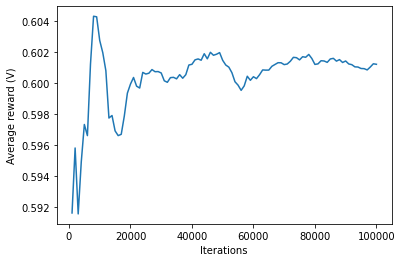

In [15]:
plt.plot(np.arange(1000, pulls+1, step=1000), rewards_ucb)
plt.xlabel("Iterations")
plt.ylabel("Average reward (V)")